## hierarcy clustering of vacuolar proteome

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
import seaborn as sns

In [14]:
df = pd.read_csv('data_vac.csv')
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,Taxonomy IDs
0,A0A0B7P3V8;P0C2J7;Q6Q5P6;P47024,A0A0B7P3V8;P0C2J7;Q6Q5P6;P47024,2;2;1;1,2;2;1;1,2;2;1;1,Transposon Ty4-H Gag-Pol polyprotein;Capsid pr...,YPL060C-A;TY4B-H;TY4A-H;TY4B-J,sp|A0A0B7P3V8|YP41B_YEAST Transposon Ty4-P Gag...,4,2,...,0,10545;13140,True;True,11499;14314,143279;143280;175439;175440,243420;243421;294134,243420;294134,0,80,559292;559292;559292;559292
1,A5Z2X5,A5Z2X5,1,1,1,UPF0495 protein YPR010C-A,YPR010C-A,sp|A5Z2X5|YP010_YEAST UPF0495 protein YPR010C-...,1,1,...,1,13064,True,14233,174499;174500;174501;174502;174503;174504;1745...,292740;292741;292742;292743;292744;292745;2927...,292743,NaN,NaN,559292
2,D6VTK4,D6VTK4,2,2,2,Pheromone alpha factor receptor,STE2,sp|D6VTK4|STE2_YEAST Pheromone alpha factor re...,1,2,...,32,4082;15305,True;True,4480;16877,54034;54035;206169,89757;89758;344867,89758;344867,NaN,NaN,559292
3,D6W196,D6W196,2,2,2,Truncated non-functional calcium-binding mitoc...,SAL1,sp|D6W196|CMC1_YEAST Truncated non-functional ...,1,2,...,33,3154;14033,True;True,3470;15388,42301;187814;187815,70393;313055;313056,70393;313055,37;38,56;61,559292
4,O13297,O13297,2,2,2,mRNA-capping enzyme subunit beta,CET1,sp|O13297|CET1_YEAST mRNA-capping enzyme subun...,1,2,...,34,8503;8688,True;True,9286;9486,114296;114297;114298;114299;114300;114301;1169...,195815;195816;200044;200045;200046;200047,195815;200046,NaN,NaN,559292


In [29]:
df_normalized = df[df.columns[141:163]]
df_normalized.set_index(df["Gene names"], inplace=True)

In [32]:
df_normalized

,Ratio H/L normalized apl5_1,Ratio H/L normalized apl5_2,Ratio H/L normalized apl5_3,Ratio H/L normalized apl5_4,Ratio H/L normalized atg19_1,Ratio H/L normalized atg19_2,Ratio H/L normalized atg19_3,Ratio H/L normalized atg19_4,Ratio H/L normalized gga_1,Ratio H/L normalized gga_2,...,Ratio H/L normalized vps10_1,Ratio H/L normalized vps10_2,Ratio H/L normalized vps10_3,Ratio H/L normalized vps10_4,Ratio H/L normalized vps45_1,Ratio H/L normalized vps45_2,Ratio H/L normalized vps45_3,Ratio H/L normalized vps45_4,Ratio H/L normalized WT_1,Ratio H/L normalized WT_2
Gene names,,,,,,,,,,,,,,,,,,,,,
YPL060C-A;TY4B-H;TY4A-H;TY4B-J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YPR010C-A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2775,2.19230,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STE2,NaN,NaN,NaN,0.70672,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91641,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CET1,NaN,NaN,NaN,NaN,0.95235,NaN,NaN,1.5431,NaN,NaN,...,NaN,NaN,NaN,1.09540,NaN,NaN,NaN,NaN,1.04800,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FRT1,NaN,NaN,0.6577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENV10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HRP1,NaN,NaN,NaN,NaN,0.94466,0.89214,0.82075,1.0528,0.83647,0.7797,...,1.0442,1.5426,NaN,0.92757,NaN,NaN,0.62254,0.91977,0.96199,0.99632


c:\Users\r04km21\Anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


ValueError: The condensed distance matrix must contain only finite values.

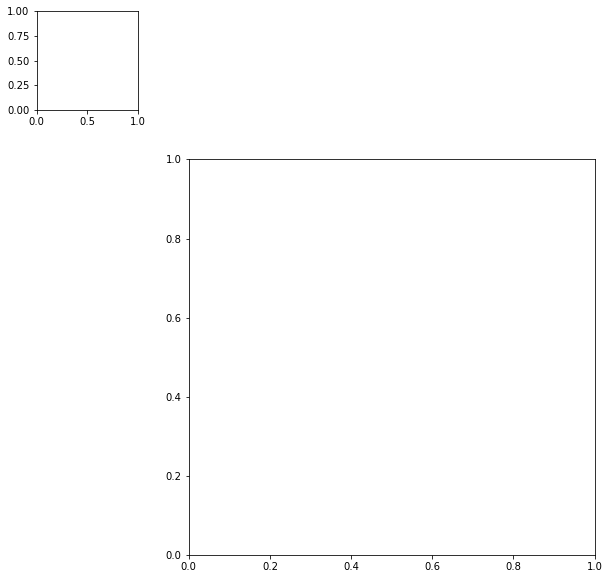

In [36]:
sns.clustermap(df_normalized, metric="euclidean", standard_scale=1)

In [23]:
df.columns.get_loc("Ratio H/L normalized apl5_1")

141

In [24]:
df.columns.get_loc("Ratio H/L normalized WT_3")

163